In [1]:
# !pip install pykan
!pip install pykan

In [2]:
import torch
import matplotlib.pyplot as plt
from kan import KAN, create_dataset
from kan.feynman import get_feynman_dataset

## Tests with dataset I.6.20

### Human-constructed KAN

#### Initial testing

In [11]:
# Set seed
seed = 42
torch.manual_seed(seed)
# 1. Get Feynman Dataset Info
dataset_name = 'I.6.20b'
symbol, expr, f, ranges = get_feynman_dataset(dataset_name)
# 2. Create Dataset
# n_var is the number of input variables (len(ranges))
dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=5000, test_num=5000, seed=seed)
print(f"Dataset {dataset_name} generated.")

# 3. Initialize KAN Model with coarse grid G=3

model = KAN(width=[len(ranges), 2, 2, 1, 1], grid=3, k=3, seed=seed)

# 4. Train with Grid Extension (Paper Protocol)
# "increasing number of grid points every 200 steps to cover G = {3,5,10,20,50,100,200}"
grids = [3, 5, 10, 20, 50, 100, 200]
steps_per_grid = 200
print(f"Starting training with grids: {grids}")
for i, g in enumerate(grids):
    if i > 0:
        # Refine the grid to the new size 'g'
        # This returns a NEW model with finer grid, initialized from the old one
        model = model.refine(g)
    
    print(f"Training grid: {g}")
    # Train for 200 steps
    results = model.fit(dataset, opt="LBFGS", steps=steps_per_grid, lamb=0.0)
    
    print(f"Grid: {g}, Train RMSE: {results['train_loss'][-1]:.4e}, Test RMSE: {results['test_loss'][-1]:.4e}")
# 5. Plot final model
model.plot()
plt.show()

Dataset I.6.20b generated.
checkpoint directory created: ./model
saving model version 0.0
Starting training with grids: [3, 5, 10, 20, 50, 100, 200]
Training grid: 3


| train_loss: 3.57e-02 | test_loss: 3.70e-02 | reg: 1.18e+01 | : 100%|█| 200/200 [05:52<00:00,  1.76


saving model version 0.1
Grid: 3, Train RMSE: 3.5678e-02, Test RMSE: 3.7034e-02
saving model version 0.2
Training grid: 5


| train_loss: 7.61e-02 | test_loss: 8.30e-02 | reg: 0.00e+00 | :   6%| | 13/200 [00:19<04:38,  1.49s


KeyboardInterrupt: 

In [13]:
results.keys()

dict_keys(['train_loss', 'test_loss', 'reg'])

In [ ]:
model = KAN(width=[len(ranges), 2, 2, 5], grid=3, k=3, seed=seed)
model.width # outputs [[3, 0], [2, 0], [2, 0], [5, 0]]

checkpoint directory created: ./model
saving model version 0.0


[[3, 0], [2, 0], [2, 0], [5, 0]]

In [ ]:
model.width

[[3, 0], [2, 0], [2, 0], [5, 0]]

In [34]:
model.fit(dataset, opt="LBFGS", steps=10, lamb=0.0)

| train_loss: 5.54e-02 | test_loss: 5.71e-02 | reg: 2.01e+01 | : 100%|█| 10/10 [00:10<00:00,  1.00s/

saving model version 0.1


{'train_loss': [array(0.10290744, dtype=float32),
  array(0.0856836, dtype=float32),
  array(0.06862621, dtype=float32),
  array(0.06381644, dtype=float32),
  array(0.06116717, dtype=float32),
  array(0.05836762, dtype=float32),
  array(0.05681077, dtype=float32),
  array(0.05628968, dtype=float32),
  array(0.05577387, dtype=float32),
  array(0.05544556, dtype=float32)],
 'test_loss': [array(0.10627393, dtype=float32),
  array(0.08581243, dtype=float32),
  array(0.07040535, dtype=float32),
  array(0.06537529, dtype=float32),
  array(0.06252158, dtype=float32),
  array(0.06003185, dtype=float32),
  array(0.05805768, dtype=float32),
  array(0.05768076, dtype=float32),
  array(0.05736027, dtype=float32),
  array(0.05706083, dtype=float32)],
 'reg': [array(0., dtype=float32),
  array(0., dtype=float32),
  array(0., dtype=float32),
  array(0., dtype=float32),
  array(0., dtype=float32),
  array(0., dtype=float32),
  array(0., dtype=float32),
  array(0., dtype=float32),
  array(0., dtype=flo

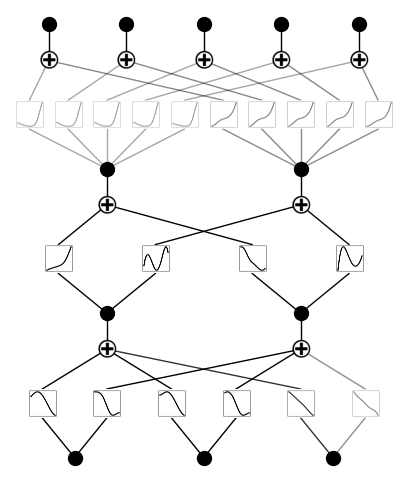

In [35]:
model.plot()
plt.show()

Dataset I.6.20 generated.
Using (2, 2, 1, 1) KAN
checkpoint directory created: ./model
saving model version 0.0
Starting training with grids: [3, 5, 10, 20, 50, 100, 200]
Training grid: 3


| train_loss: 2.09e-03 | test_loss: 2.11e-03 | reg: 8.52e+00 | : 100%|█| 200/200 [06:35<00:00,  1.98


saving model version 0.1
Grid: 3, Train RMSE: 2.0906e-03, Test RMSE: 2.1050e-03
saving model version 0.2
Training grid: 5


| train_loss: 1.16e-03 | test_loss: 1.17e-03 | reg: 8.45e+00 | : 100%|█| 200/200 [07:08<00:00,  2.14


saving model version 0.3
Grid: 5, Train RMSE: 1.1561e-03, Test RMSE: 1.1689e-03
saving model version 0.4
Training grid: 10


| train_loss: 4.70e-04 | test_loss: 4.82e-04 | reg: 7.86e+00 | : 100%|█| 200/200 [08:37<00:00,  2.59


saving model version 0.5
Grid: 10, Train RMSE: 4.7036e-04, Test RMSE: 4.8189e-04
saving model version 0.6
Training grid: 20


| train_loss: 3.25e-04 | test_loss: 3.38e-04 | reg: 7.84e+00 | : 100%|█| 200/200 [11:14<00:00,  3.37


saving model version 0.7
Grid: 20, Train RMSE: 3.2534e-04, Test RMSE: 3.3790e-04
saving model version 0.8
Training grid: 50


| train_loss: 2.44e-04 | test_loss: 2.53e-04 | reg: 7.92e+00 | : 100%|█| 200/200 [20:01<00:00,  6.01


saving model version 0.9
Grid: 50, Train RMSE: 2.4385e-04, Test RMSE: 2.5270e-04
saving model version 0.10
Training grid: 100


| train_loss: 2.38e-04 | test_loss: 2.51e-04 | reg: 7.92e+00 | : 100%|█| 200/200 [15:52<00:00,  4.76


saving model version 0.11
Grid: 100, Train RMSE: 2.3789e-04, Test RMSE: 2.5056e-04
saving model version 0.12
Training grid: 200


| train_loss: 2.31e-04 | test_loss: 2.56e-04 | reg: 7.92e+00 | : 100%|█| 200/200 [28:40<00:00,  8.60


saving model version 0.13
Grid: 200, Train RMSE: 2.3127e-04, Test RMSE: 2.5642e-04


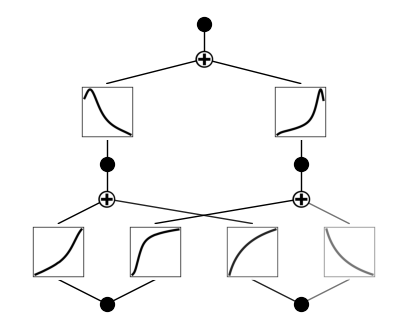

In [5]:
import torch
import matplotlib.pyplot as plt
from kan import KAN, create_dataset
from kan.feynman import get_feynman_dataset
# Set seed
seed = 42
torch.manual_seed(seed)
# 1. Get Feynman Dataset Info
dataset_name = 'I.6.20'
symbol, expr, f, ranges = get_feynman_dataset(dataset_name)
# 2. Create Dataset
# n_var is the number of input variables (len(ranges))
dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=15000, test_num=15000, seed=seed)
print(f"Dataset {dataset_name} generated.")

# 3. Initialize KAN Model with coarse grid G=3

print(f'Using {len(ranges), 2, 1, 1} KAN')
model = KAN(width=[len(ranges), 2, 1], grid=3, k=3, seed=seed)

# 4. Train with Grid Extension (Paper Protocol)
# "increasing number of grid points every 200 steps to cover G = {3,5,10,20,50,100,200}"
grids = [3, 5, 10, 20, 50, 100, 200]
steps_per_grid = 200
print(f"Starting training with grids: {grids}")
for i, g in enumerate(grids):
    if i > 0:
        # Refine the grid to the new size 'g'
        # This returns a NEW model with finer grid, initialized from the old one
        model = model.refine(g)
    
    print(f"Training grid: {g}")
    # Train for 200 steps
    results = model.fit(dataset, opt="LBFGS", steps=steps_per_grid, lamb=0.0)
    
    print(f"Grid: {g}, Train RMSE: {results['train_loss'][-1]:.4e}, Test RMSE: {results['test_loss'][-1]:.4e}")
# 5. Plot final model
model.plot()
plt.show()

Dataset I.6.20 generated.
Using (2, 2, 1, 1) KAN
checkpoint directory created: ./model
saving model version 0.0
Dataset moved to CUDA.
Starting training with grids: [3, 5, 10, 20, 50, 100, 200]
Training grid: 3


description:   0%|                                                          | 0/200 [00:00<?, ?it/s]

| train_loss: 1.69e-03 | test_loss: 1.68e-03 | reg: 8.37e+00 | : 100%|█| 200/200 [00:46<00:00,  4.34


saving model version 0.1
Grid: 3, Train RMSE: 1.6873e-03, Test RMSE: 1.6785e-03
saving model version 0.2
Training grid: 5


| train_loss: 1.32e-03 | test_loss: 1.38e-03 | reg: 8.48e+00 | : 100%|█| 200/200 [00:44<00:00,  4.54


saving model version 0.3
Grid: 5, Train RMSE: 1.3249e-03, Test RMSE: 1.3831e-03
saving model version 0.4
Training grid: 10


| train_loss: 4.60e-04 | test_loss: 4.99e-04 | reg: 8.41e+00 | : 100%|█| 200/200 [00:35<00:00,  5.68


saving model version 0.5
Grid: 10, Train RMSE: 4.6021e-04, Test RMSE: 4.9874e-04
saving model version 0.6
Training grid: 20


| train_loss: 2.25e-04 | test_loss: 3.25e-04 | reg: 8.44e+00 | : 100%|█| 200/200 [00:24<00:00,  8.07


saving model version 0.7
Grid: 20, Train RMSE: 2.2455e-04, Test RMSE: 3.2521e-04
saving model version 0.8
Training grid: 50


| train_loss: 1.16e-04 | test_loss: 2.74e-04 | reg: 8.44e+00 | : 100%|█| 200/200 [00:29<00:00,  6.74


saving model version 0.9
Grid: 50, Train RMSE: 1.1637e-04, Test RMSE: 2.7409e-04
saving model version 0.10
Training grid: 100


| train_loss: 8.90e-05 | test_loss: 2.84e-04 | reg: 8.44e+00 | : 100%|█| 200/200 [00:20<00:00,  9.65


saving model version 0.11
Grid: 100, Train RMSE: 8.9032e-05, Test RMSE: 2.8356e-04
saving model version 0.12
Training grid: 200


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:41<00:00,  4.79it/s]


saving model version 0.13
Grid: 200, Train RMSE: nan, Test RMSE: nan


ValueError: alpha (nan) is outside 0-1 range

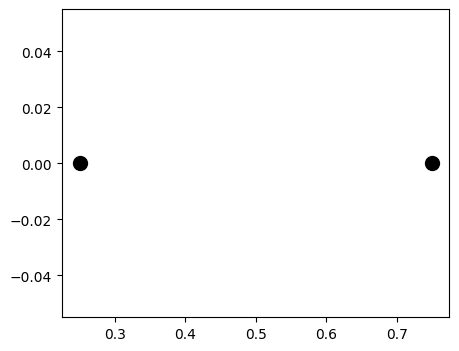

In [ ]:
import torch
import matplotlib.pyplot as plt
from kan import KAN, create_dataset
from kan.feynman import get_feynman_dataset
# Set seed
seed = 42
torch.manual_seed(seed)
# 1. Get Feynman Dataset Info
dataset_name = 'I.6.20'
symbol, expr, f, ranges = get_feynman_dataset(dataset_name)
# 2. Create Dataset
# n_var is the number of input variables (len(ranges))
dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=1000, test_num=1000, seed=seed)
print(f"Dataset {dataset_name} generated.")

# 3. Initialize KAN Model with coarse grid G=3

print(f'Using {len(ranges), 2, 1, 1} KAN')
model = KAN(width=[len(ranges), 2, 1], grid=3, k=3, seed=seed)
model.to('cuda')
dataset['train_input'] = dataset['train_input'].to('cuda')
dataset['train_label'] = dataset['train_label'].to('cuda')
dataset['test_input'] = dataset['test_input'].to('cuda')
dataset['test_label'] = dataset['test_label'].to('cuda')
print("Dataset moved to CUDA.")


# 4. Train with Grid Extension (Paper Protocol)
# "increasing number of grid points every 200 steps to cover G = {3,5,10,20,50,100,200}"
grids = [3, 5, 10, 20, 50, 100, 200]
steps_per_grid = 200
print(f"Starting training with grids: {grids}")
for i, g in enumerate(grids):
    if i > 0:
        # Refine the grid to the new size 'g'
        # This returns a NEW model with finer grid, initialized from the old one
        model = model.refine(g)
    
    print(f"Training grid: {g}")
    # Train for 200 steps
    results = model.fit(dataset, opt="LBFGS", steps=steps_per_grid, lamb=0.0)
    
    print(f"Grid: {g}, Train RMSE: {results['train_loss'][-1]:.4e}, Test RMSE: {results['test_loss'][-1]:.4e}")
# 5. Plot final model
model.plot()
plt.show()

#### Encapsulate in a function

In [4]:
def run_kan_feynman(dataset: str,
                          shape: list[int],
                          samples: int, # samples for both train and test (separated) sets
                          start_grid: int = 3,
                          k: int = 3,
                          device='cuda' if torch.cuda.is_available() else 'cpu',
                          seed=42,
                          grids=[3, 5, 10, 20, 50, 100, 200],
                          steps_per_grid=200,
                          plot_model=True,
                          prune=False,
                          prune_threshold=0.01,
                          steps_after_prune=200,
                          lamb=0.00,
                          opt="LBFGS"):
    
    if isinstance(seed, list):
        all_results = []
        for s in seed:
            model, per_grid_results, best_test_rmse = run_kan_feynman(dataset=dataset,
                                                                           shape=shape,
                                                                           samples=samples,
                                                                           start_grid=start_grid,
                                                                           k=k,
                                                                           device=device,
                                                                           seed=s,
                                                                           grids=grids,
                                                                           steps_per_grid=steps_per_grid,
                                                                           plot_model=plot_model,
                                                                           prune=prune,
                                                                           prune_threshold=prune_threshold,
                                                                           steps_after_prune=steps_after_prune,
                                                                           lamb=lamb,
                                                                           opt=opt)
            all_results.append((model, per_grid_results, best_test_rmse))
        return all_results


    assert device in ['cpu', 'cuda']
    torch.manual_seed(seed)

    
    try:
        symbol, expr, f, ranges = get_feynman_dataset(dataset)
    except ValueError:
        raise ValueError("Invalid dataset name")

    dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=samples, test_num=samples, seed=seed)


    dataset['train_input'] = dataset['train_input'].to(device)
    dataset['train_label'] = dataset['train_label'].to(device)
    dataset['test_input'] = dataset['test_input'].to(device)
    dataset['test_label'] = dataset['test_label'].to(device)

    assert shape[0] == len(ranges), "Input dimension does not match number of variables in dataset"
    model = KAN(width=shape, grid=start_grid, k=k, seed=seed).to(device)

    per_grid_results = {}

    for i, g in enumerate(grids):
        if i > 0: #skip first iteration
            model = model.refine(g)
        
        print(f"Training grid: {g}")
        results = model.fit(dataset, opt=opt, steps=steps_per_grid, lamb=lamb)
        per_grid_results[g] = results

    if prune:
        model = model.prune(prune_threshold)
        results = model.fit(dataset, opt=opt, steps=steps_after_prune, lamb=lamb)
        assert False, 'Not implemented yet'

    if plot_model:
        model.plot()
        plt.show()

    best_test_rmse = min(per_grid_results.values(), key=lambda x: x['test_loss'][-1])['test_loss'][-1]
    
    return model, per_grid_results, best_test_rmse

In [5]:
model, per_grid_results, test_rmse = run_kan_feynman(dataset='I.6.20b', samples=1000, shape=[3,2,2,1,1])

checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 3.44e-02 | test_loss: 3.75e-02 | reg: 1.17e+01 | : 100%|█| 200/200 [02:02<00:00,  1.64


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 3.32e-02 | test_loss: 3.90e-02 | reg: 1.21e+01 | : 100%|█| 200/200 [01:49<00:00,  1.83


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [02:07<00:00,  1.57it/s]


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: nan | test_loss: nan | reg: 0.00e+00 | :  79%|████▋ | 158/200 [01:46<00:28,  1.48it/s]


KeyboardInterrupt: 

### KAN without pruning

In [ ]:
def sweep_kan_feynman(dataset:str, width: int=5, **kwargs):

    per_depth_results = {}
    per_depth_models = {}
    best_test_rmse = float('inf')

    for depth in [2,3,4,5,6]:
        shape = [width for _ in range(depth)]
        results = run_kan_feynman(dataset=dataset, shape=shape, **kwargs)
            
        if isinstance(results, list):
            # used multiple seeds - take best rmse from different seeds
            test_rmse = min([res[2] for res in results])
            per_grid_results = [res[1] for res in results]
            model = [res[0] for res in results]
        else:
            model, per_grid_results, test_rmse = results


        if test_rmse < best_test_rmse:
            best_test_rmse = test_rmse

        per_depth_results[depth] = per_grid_results
        per_depth_models[depth] = model

    return per_depth_models, per_depth_results, best_test_rmse

In [ ]:
def get_smallest_shape(results, rmse_threshold: float=1e-2):
    pass


def get_shape_best_loss(results):
    pass

In [ ]:
def feynman_human_kan_experiment(dataset: str, seeds: int| list[int] = [42, 171, 3], samples: int = 5000):
    """
    Run feynman dataset experiment with human-constructed KAN
    """
    results = run_kan_feynman(dataset=dataset,
                             seed=seeds,
                             samples=samples)
    
    if isinstance(results, list):
        best_test_rmse = min([res[2] for res in results])
    else:
        best_test_rmse = results[2]

    print('==='*20)
    print(f'Best Test RMSE for human-constructed KAN on dataset {dataset}: {best_test_rmse:.4e}')

    return results
    

def feunman_not_pruned_kan_experiment(dataset: str, seeds: int | list[int], samples=500):

    results = run_kan_feynman(dataset=dataset,
                            seed=seeds,
                            samples=samples,
                            prune=False)

    print('==='*20)
    print(f'Best Test RMSE for not pruned KAN on dataset {dataset}: {results[2]:.4e}')
    return results


def feynman_pruned_kan_experiment(dataset: str, seeds: int|list[int] = [42, 171, 3], samples: int = 5000, steps_after_prune: int = 100):
    """
    Run feynman dataset experiment with pruned KAN
    """
    results = run_kan_feynman(dataset=dataset,
                             seed=seeds,
                             samples=samples,
                             prune=True,
                             prune_threshold=0.01,
                             steps_after_prune=steps_after_prune)
    

    smalles_shape = get_smallest_shape(results, rmse_threshold=1e-2)
    shape_best_loss = get_shape_best_loss(results)

    best_test_rmse = results[2]

    print('==='*20)
    print(f'Smallest shape achieving RMSE < 1e-2 on dataset {dataset}: {smalles_shape}')
    print(f'Shape achieving best loss on dataset {dataset}: {shape_best_loss}')
    print(f'Best Test RMSE for pruned KAN on dataset {dataset}: {best_test_rmse:.4e}')

    return results
